In [24]:
import numpy as np

def Euler_FTFS(length, n_points, dt, velocity, T0, T0_position, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
               error_tolerance, max_iter):

    dx = length/(n_points-1)
    courant = velocity*dt/dx

    grid = np.zeros(n_points)
    err_array = []

    iter = 0
    error = 1
    grid[T0_position-1] = T0

    new_grid = grid.copy()

    while (error > error_tolerance) and (iter <= max_iter):
        error = 0
        
        if Left_BC == 2:
            new_grid[0] = Left_BC_value
        if Right_BC == 2:
            new_grid[-1] = Right_BC_value
        
        grid = new_grid.copy()
        iter += 1
        
        for i in range(1, n_points-1):
            new_grid[i] = grid[i] - courant*(grid[i+1]-grid[i])

            if Left_BC == 1:
                new_grid[0] = new_grid[1]

            if Right_BC == 1:
                new_grid[-1] = new_grid[-2]
                
        for i in range(n_points):
            error += abs(new_grid[i]-grid[i])
            
        err_array.append(error)
            
    return new_grid, err_array, courant

def Upwind(length, n_points, dt, velocity, T0, T0_position, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
           error_tolerance, max_iter):

    dx = length/(n_points-1)
    courant = velocity*dt/dx

    grid = np.zeros(n_points)
    err_array = []

    iter = 0
    error = 1
    grid[T0_position-1] = T0

    new_grid = grid.copy()

    while (error > error_tolerance) and (iter <= max_iter):
        error = 0

        if Left_BC == 2:
            new_grid[0] = Left_BC_value
        if Right_BC == 2:
            new_grid[-1] = Right_BC_value
        
        grid = new_grid.copy()
        iter += 1

        for i in range(1, n_points-1):
            new_grid[i] = grid[i] - courant*(grid[i]-grid[i-1])

            if Left_BC == 1:
                new_grid[0] = new_grid[1]

            if Right_BC == 1:
                new_grid[-1] = new_grid[-2]
                
        for i in range(n_points):
            error += abs(new_grid[i]-grid[i])
            
        err_array.append(error)
            
    return new_grid, err_array, courant

def Euler_FTCS(length, n_points, dt, velocity, T0, T0_position, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
               error_tolerance, max_iter):

    dx = length/(n_points-1)
    courant = velocity*dt/dx

    grid = np.zeros(n_points)
    err_array = []

    iter = 0
    error = 1
    grid[T0_position-1] = T0

    new_grid = grid.copy()

    while (error > error_tolerance) and (iter <= max_iter):
        error = 0
        
        if Left_BC == 2:
            new_grid[0] = Left_BC_value
        if Right_BC == 2:
            new_grid[-1] = Right_BC_value
        
        grid = new_grid.copy()
        iter += 1

        for i in range(1, n_points-1):
            new_grid[i] = grid[i] - courant*(grid[i+1]-grid[i-1])/2

            if Left_BC == 1:
                new_grid[0] = new_grid[1]

            if Right_BC == 1:
                new_grid[-1] = new_grid[-2]
                
        for i in range(n_points):
            error += abs(new_grid[i]-grid[i])
            
        err_array.append(error)
            
    return new_grid, err_array, courant

def Lax(length, n_points, dt, velocity, T0, T0_position, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
        error_tolerance, max_iter):
        
    dx = length/(n_points-1)
    courant = velocity*dt/dx

    grid = np.zeros(n_points)
    err_array = []

    iter = 0
    error = 1
    grid[T0_position-1] = T0

    new_grid = grid.copy()

    while (error > error_tolerance) and (iter <= max_iter):
        error = 0
        
        if Left_BC == 2:
            new_grid[0] = Left_BC_value
        if Right_BC == 2:
            new_grid[-1] = Right_BC_value
        
        grid = new_grid.copy()
        iter += 1
        
        for i in range(1, n_points-1):
            new_grid[i] = (grid[i+1]+grid[i-1])/2 - courant*(grid[i+1]-grid[i-1])/2

            if Left_BC == 1:
                new_grid[0] = new_grid[1]

            if Right_BC == 1:
                new_grid[-1] = new_grid[-2]
                
        for i in range(n_points):
            error += abs(new_grid[i]-grid[i])
            
        err_array.append(error)
            
    return new_grid, err_array, courant

def Lax_Wendroff(length, n_points, dt, velocity, T0, T0_position, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
                 error_tolerance, max_iter):

    dx = length/(n_points-1)
    courant = velocity*dt/dx

    grid = np.zeros(n_points)
    err_array = []

    iter = 0
    error = 1
    grid[T0_position-1] = T0

    new_grid = grid.copy()

    while (error > error_tolerance) and (iter <= max_iter):
        error = 0
        
        if Left_BC == 2:
            new_grid[0] = Left_BC_value
        if Right_BC == 2:
            new_grid[-1] = Right_BC_value
        
        grid = new_grid.copy()
        iter += 1
        
        for i in range(1, n_points-1):
            new_grid[i] = grid[i] - courant*(grid[i+1]-grid[i-1])/2 + courant**2/2*(grid[i+1]-2*grid[i]+grid[i-1])

            if Left_BC == 1:
                new_grid[0] = new_grid[1]

            if Right_BC == 1:
                new_grid[-1] = new_grid[-2]
                
        for i in range(n_points):
            error += abs(new_grid[i]-grid[i])
            
        err_array.append(error)
            
    return new_grid, err_array, courant

In [25]:
print('                    1D Convection Explicit Solver                    ')
print('\n=====================================================================')
print('            Michael Agung Nugroho - Kukuh Iksan Musyahada            ')
print('                         13618004 - 13618045                         ')
print('\n=====================================================================')

print('1D Convection Explicit Solver\n')
print('1. Euler Forward Time Forward Space (FTFS) Method')
print('2. Euler Forward Time Central Space (FTCS) Method')
print('3. Upwind Method')
print('4. Lax Method')
print('5. Lax-Wendroff Method\n')

method = int(input('Choose the solver (1/2/3/4/5)         : '))
print('\n=====================================================================')

if method == 1:
    name = 'Euler_FTFS'
    func = Euler_FTFS
elif method == 2:
    name = 'Euler_FTCS'
    func = Euler_FTCS
elif method == 3:
    name = 'Upwind'
    func = Upwind
elif method == 4:
    name = 'Lax'
    func = Lax
elif method == 5:
    name = 'Lax-Wendroff'
    func = Lax_Wendroff

print('Input Parameter\n')

length = float(input('Input the length          : '))
n      = int(input('Input number of points    : '))
dt     = float(input('Input time step           : '))
u      = float(input('Input velocity            : '))

error_tolerance = float(input('\nInput error tolerance        : '))
max_iter        = int(input('Input maximum iteration      : '))
print('\n=====================================================================')

print('Input Initial Condition\n')

T0          = float(input('Input initial temperature                               : '))
T0_location = int(input('Input at which point the initial temperature is given   : '))
print('\n=====================================================================')



print('Input Boundary Condition\n')

print('1: Neumann BC')
print('2: Dirichlet BC\n')

Left_BC = int(input('Left boundary condition (1/2): '))
if Left_BC == 2:
    Left_BC_value = float(input('Left boundary condition value: '))    
else:
    Left_BC_value = 0
    
print('\nRight Boundary Condition MUST be Neumann\n')
print('Right boundary condition : 1')
    
Right_BC = 1
Right_BC_value = 0
    
print('\n=====================================================================')

Result, Error, courant = func(length, n, dt, u, T0, T0_location, Left_BC, Left_BC_value, Right_BC, Right_BC_value,
                              error_tolerance, max_iter)

print('RESULT\n')

print('Method           : ' + name)
print('Courant number   : ' + str(courant) + '\n')

if Error[-1] < error_tolerance:
    print('The calculation is converged at ' + str(len(Error)) + ' iteration\n')
    print('Final Temperature')
    print(Result)
    print('\nError: ' + str(Error[-1]))
else:
    print("The calculation hasn't converged until " + str(max_iter) + " iteration")
    
print('\n=====================================================================')

                    1D Convection Explicit Solver                    

            Michael Agung Nugroho - Kukuh Iksan Musyahada            
                         13618004 - 13618045                         

1D Convection Explicit Solver

1. Euler Forward Time Forward Space (FTFS) Method
2. Euler Forward Time Central Space (FTCS) Method
3. Upwind Method
4. Lax Method
5. Lax-Wendroff Method

Choose the solver (1/2/3/4/5)         : 3

Input Parameter

Input the length          : 2
Input number of points    : 21
Input time step           : 0.05
Input velocity            : 1

Input error tolerance        : 1e-5
Input maximum iteration      : 1000

Input Initial Condition

Input initial temperature                               : 100
Input at which point the initial temperature is given   : 11

Input Boundary Condition

1: Neumann BC
2: Dirichlet BC

Left boundary condition (1/2): 2
Left boundary condition value: 130

Right Boundary Condition MUST be Neumann

Right boundary condition : 

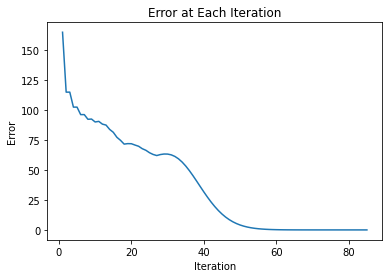

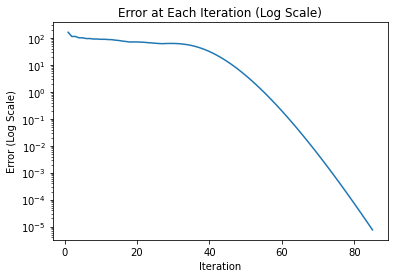

In [26]:
import matplotlib.pyplot as plt

x = []

for i in range(1,len(Error)+1):
    x.append(i)

plt.plot(x, Error)
plt.title('Error at Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

plt.plot(x, Error)
plt.yscale("log")
plt.title('Error at Each Iteration (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Error (Log Scale)')
plt.show()